# Model Visualisation
### This script will be used to visualize the model predictions

In [1]:
from keras.models import load_model
from keras.utils import plot_model
from keras.preprocessing.image import load_img , img_to_array , ImageDataGenerator 
from keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt
import cv2
import numpy as np

Using TensorFlow backend.


In [2]:
#Helper functions
def show_images(unprocess=True):
#used to visualise images 
    plt.clf()
    def reverse_preprocess_input(x0):
        x = x0 / 2.0
        x += 0.5
        x *= 255.
        return x
    #import pdb;pdb.set_trace()
    for x in generatorTest:
        fig, axes = plt.subplots(nrows=8, ncols=4)
        fig.set_size_inches(8, 8)
        page = 0
        page_size = 32
        start_i = page * page_size
        for i, ax in enumerate(axes.flat):
            img = x[0][i+start_i]
            
            if unprocess:
                im = ax.imshow(reverse_preprocess_input(img).astype('uint8') )
            else:
                im = ax.imshow((img/2.0)+.5) #matplotlib can only plot between range of 0 and 1
                
            ax.set_axis_off()
            ax.title.set_visible(False)
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
            for spine in ax.spines.values():
                spine.set_visible(False)

        plt.subplots_adjust(left=0, wspace=0, hspace=0)
        plt.show()
        break


def model_evaluate(model):
    (eval_loss, eval_accuracy) = model.evaluate_generator(generatorTest,steps=None,verbose=1)
    print('Evaluating the:'.format(model.metrics_names))

    print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
    print("[INFO] Loss: {}".format(eval_loss))

    
def _predict_img(model,image,class_dictionary):

    #getting the predictions
    y_pred_prob = model.predict(image)
    class_predicted_ix = np.argmax(y_pred_prob, axis=1)
    
    #convert from ix to class label
    inv_map = {v: k for k, v in class_dictionary.items()}
    label = inv_map[class_predicted_ix[0]]    
    return label,y_pred_prob[0][class_predicted_ix[0]]



def visualise_predict(model,imagePath,topNum = 5):
    # load the class_indices saved in the earlier step
    class_dictionary = np.load('class_indices.npy').item()
    num_classes = len(class_dictionary)
    # add the path to your test image below
    orig = cv2.imread(imagePath)

    print("[INFO] loading and preprocessing image...")
    image = load_img(imagePath, target_size=(299, 299))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

    #do all the preprocessing for the images
    # important! otherwise the predictions will be '0'
    image = preprocess_input(image)


    y_pred_prob = model.predict(image)
    cls = np.argmax(y_pred_prob, axis=1)
    top_n_preds_ix = np.argpartition(y_pred_prob, -topNum)[:,-topNum:]
    
    #convert from ix to class label
    inv_map = {v: k for k, v in class_dictionary.items()}
    label = reversed([inv_map[x] for x in top_n_preds_ix[0]])
    probability = reversed([y_pred_prob[0,x] for x in top_n_preds_ix[0]])

    # get the prediction label
    #print("Predicted Label: {}, Probability: {}".format(label, probability))
    for c, p in zip(label, probability):
        print('\t{:15s}\twith probability {:.5f}'.format(c, p))

    toplabel = inv_map[cls[0]]
    # display the predictions with the image
    cv2.putText(orig, "Predicted: {}".format(toplabel), (10, 30),
                cv2.FONT_HERSHEY_PLAIN, 1.5, (43, 99, 255), 2)

    cv2.imshow("Classification", orig)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

### Loading the model

In [4]:
model = load_model(r'F:\FinalModel\model4b-Copy1.05-1.27.hdf5')

In [4]:
#saving the model architecture
plot_model(model, to_file='modelArchitecture.png')

### Visualising single image

In [10]:
imgUrl = r'C:\Users\Kuo Xin\Desktop\MunchAlgo\google_image_downloader-master\downloads\train\cheesecake\42503.jpg'
visualise_predict(model,imgUrl,5)

[INFO] loading and preprocessing image...
	chicken biryani	with probability 0.99674
	nasi briyani   	with probability 0.00009
	chicken rice   	with probability 0.00315
	tandoori chicken	with probability 0.00001
	chicken masala 	with probability 0.00000


### Visualising batches of images

In [6]:
testUrl =  r'F:\datasetv3\Test'

In [7]:
datagenTest = ImageDataGenerator(preprocessing_function = preprocess_input) #preprocess_input is the preprocessing function used in 
                                                #original inceptionV3 model

generatorTest = datagenTest.flow_from_directory(
    testUrl,
    target_size=(299,299),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)


Found 34477 images belonging to 406 classes.


In [8]:
class_dictionary = np.load('class_indices.npy').item()
class_dictionary

{'acai bowl': 0,
 'agedeshi tofu': 1,
 'aiyu dessert jelly': 2,
 'almond jelly': 3,
 'ang koo kueh': 4,
 'apple pie': 5,
 'asparagus': 6,
 'assam fish': 7,
 'assam pedas': 8,
 'avocado juice': 9,
 'ayam penyet': 10,
 'ayam penyet with rice': 11,
 'baby back ribs': 12,
 'bah kwa': 13,
 'bah zhang glutinous rice': 14,
 'bak chor mee': 15,
 'bak kut teh': 16,
 'baklava': 17,
 'ban mian': 18,
 'banana': 19,
 'banana cake': 20,
 'bandung drink': 21,
 'barbecued spare ribs': 22,
 'barley water': 23,
 'beancurd dessert': 24,
 'bee hoon soup': 25,
 'beef burger': 26,
 'beef carpaccio': 27,
 'beef don': 28,
 'beef kway teow': 29,
 'beef noodle soup': 30,
 'beef noodles': 31,
 'beef rendang': 32,
 'beef taco': 33,
 'beef tartare': 34,
 'beehoon fried': 35,
 'beer': 36,
 'beet salad': 37,
 'beignets': 38,
 'bibimbap': 39,
 'bingsu': 40,
 'biscuit chocolate chip': 41,
 'black forest cake': 42,
 'black pepper crab': 43,
 'blackberries': 44,
 'boiled black chicken': 45,
 'braised tea leaf egg': 46,


predicted:deviled eggs , actual:deviled eggs True
predicted:loh mai fan , actual:lontong False
predicted:croque madame , actual:croque madame True
predicted:honey dew , actual:honey dew True
predicted:sponge cake plain , actual:cup cakes False
predicted:yu sheng , actual:yu sheng True
predicted:bulgogi kimbap , actual:bulgogi kimbap True
predicted:cheese fries , actual:cheese fries True
predicted:kueh lapis , actual:kueh lapis True
predicted:hot chocolate , actual:coffee latte False
predicted:shark fin soup food , actual:shark fin soup food True
predicted:fried rice with egg , actual:cabbage fried False
predicted:kaya toast , actual:kaya toast True
predicted:eggs benedict , actual:eggs benedict True
predicted:kaya toast , actual:kaya toast True
predicted:tempura prawn , actual:tempura prawn True
predicted:spaghetti carbonara , actual:spaghetti carbonara True
predicted:roti prata , actual:roti prata True
predicted:prime rib , actual:prime rib True
predicted:chicken feet cooked , actual:

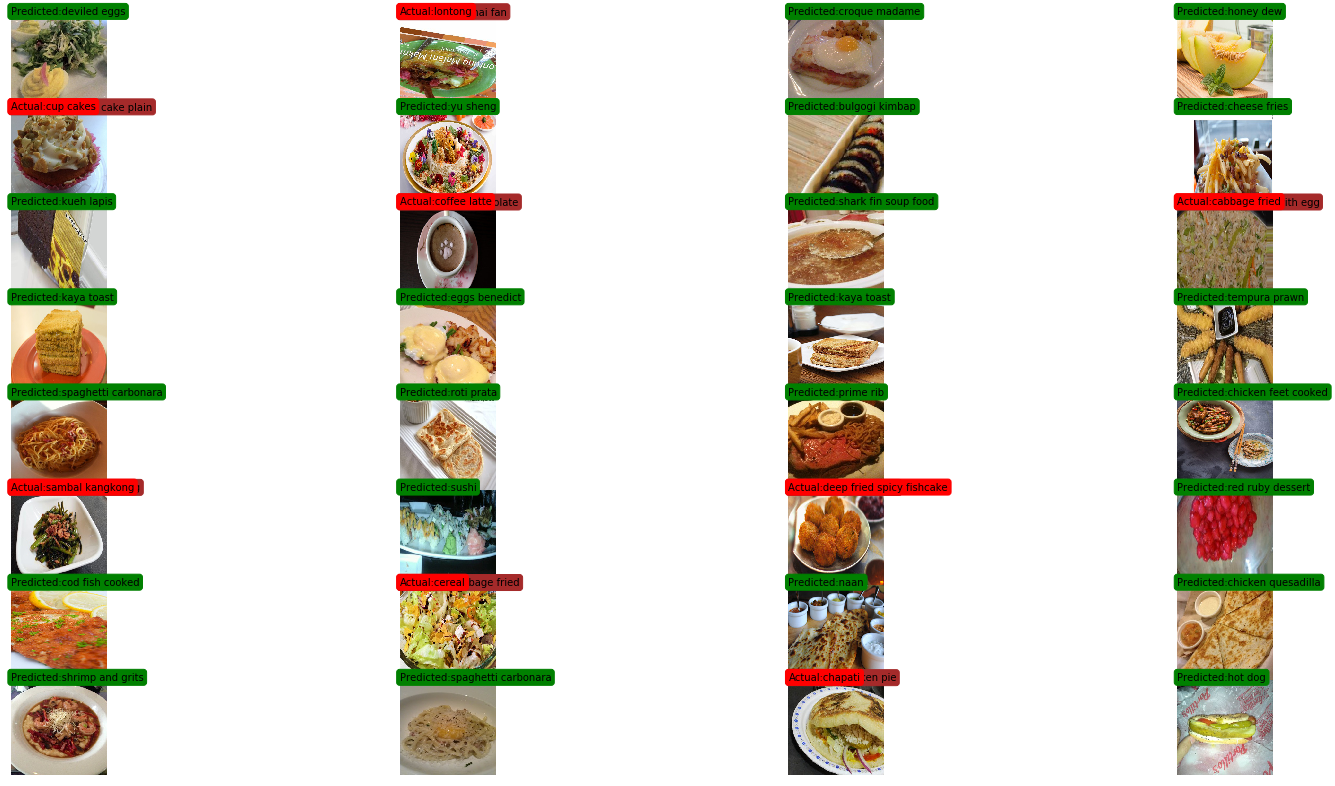

In [9]:
plt.clf()
inv_map = {v: k for k, v in class_dictionary.items()}

for x in generatorTest:
    fig, axes = plt.subplots(nrows=8, ncols=4)
    fig.set_size_inches(21, 14)
    page = 0
    page_size = 32
    start_i = page * page_size
    for i, ax in enumerate(axes.flat):
        
        #get predicted label and store as label
        img = x[0][i+start_i]
        img_expanded = np.expand_dims(img, axis=0)
        label, _ = _predict_img(model,img_expanded,class_dictionary)   
        
        #get true y_label
        y_ix = x[1][i+start_i]
        class_predicted_ix = np.nonzero(y_ix)
        y_label = inv_map[int(class_predicted_ix[0])]
        correct = label == y_label

        #draw image
        im = ax.imshow((img/2.0)+.5) #matplotlib can only plot between range of 0 and 1
        ax.set_axis_off()
        ax.title.set_visible(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])   
        
        #add the predicted and actual class
        print('predicted:{0} , actual:{1}'.format(label,y_label),correct)
        if correct:
            ax.text(0,0, 'Predicted:'+ label, size=10, rotation=0,
                 bbox=dict(boxstyle="round",ec='green',fc='green'))

        if not correct:
            ax.text(1,1, 'Predicted:'+ label, size=10, rotation=0,
                 bbox=dict(boxstyle="round",ec='brown',fc='brown'))
            ax.text(0,0, 'Actual:'+ y_label, size=10, rotation=0,
                 bbox=dict(boxstyle="round",ec='red',fc='red'))
            
        for spine in ax.spines.values():
            spine.set_visible(False)

    plt.subplots_adjust(left=0, wspace=1, hspace=0)
    plt.show()
    break

# Evaluating the model